# Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
data = pd.read_csv('Train.csv',encoding='UTF-8')

data.head(10)

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0
5,"যেমন : পরীক্ষার রেজাল্টের সময় , বিভিন্ন ব্যানি...",0
6,বিশ্বনন্দিত বিশ্ব জয় করা ইসলামের পাখিদের কোরআ...,2
7,"সাপ্তাহিক মুসুল্লিদের কথাটাও তুলে ধরলে ভাই , চ...",1
8,আমি ভেবেছিলাম গালিগালাজ করে সেরা ছেলে সে ? গাল...,0
9,"তুমি রেপারই হও , ডাক্তার হওয়ার দরকার নাই তোমার",0


### updating the column value/data 

In [9]:
# changing '0' , '1' , '2' as 'Neutral' , 'Positive' & 'Negative'
data['Label'] = data['Label'].replace({1: 'Positive'}) 
data['Label'] = data['Label'].replace({2: 'Negative'}) 
data['Label'] = data['Label'].replace({0: 'Neutral'}) 
# writing into the file 
data.to_csv("AllDetails.csv", index=False) 
print(data)

                                                    Data     Label
0      মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...  Positive
1      এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...  Negative
2                              ভাই আপনার কথাই যাদু রয়েছে  Positive
3                            উওরটা আমার অনেক ভাল লেগেছে   Positive
4      আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...   Neutral
...                                                  ...       ...
12570  বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...  Positive
12571  আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...  Negative
12572  ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...  Positive
12573  বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...  Negative
12574         বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু  Negative

[12575 rows x 2 columns]


In [10]:
data.head(10)

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,Positive
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,Negative
2,ভাই আপনার কথাই যাদু রয়েছে,Positive
3,উওরটা আমার অনেক ভাল লেগেছে,Positive
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,Neutral
5,"যেমন : পরীক্ষার রেজাল্টের সময় , বিভিন্ন ব্যানি...",Neutral
6,বিশ্বনন্দিত বিশ্ব জয় করা ইসলামের পাখিদের কোরআ...,Negative
7,"সাপ্তাহিক মুসুল্লিদের কথাটাও তুলে ধরলে ভাই , চ...",Positive
8,আমি ভেবেছিলাম গালিগালাজ করে সেরা ছেলে সে ? গাল...,Neutral
9,"তুমি রেপারই হও , ডাক্তার হওয়ার দরকার নাই তোমার",Neutral


# Dataset Preparation

In [11]:
print("Total Reviews:",len(data),
      "\nTotal label as Neutral:",len(data[data.Label == 'Neutral']),
      "\nTotal label as Positive:",len(data[data.Label == 'Positive']),
      "\nTotal label as Negative:",len(data[data.Label == 'Negative']))

Total Reviews: 12575 
Total label as Neutral: 2894 
Total label as Positive: 5133 
Total label as Negative: 4548


In [12]:
data.columns

Index(['Data', 'Label'], dtype='object')

In [13]:
# print some unprocessed reviews
sample_data = [50,100,150,200,250,630,650,666,640,650,700,750,800,1000]
for i in sample_data:
      print(data.Data[i],'\n','Sentiment:-- ',data.Label[i],'\n')

ভুটানে একা যেয়ে পুশাবে না । ঐখানে পাব্লিক বাস খুবই কম । নাই বললেই চলে । ঐখানে শেয়ারড ট্যাক্সি পাবেন 
 Sentiment:--  Neutral 

ভর দুপুরে এত খাবার দেখে ভীষণ লোভ লাগল দাদা , দিদি কে দেখতে পেলে ভালো লাগত  
 Sentiment:--  Positive 

সাধারণ মানুষদের থেকে ও তারা এভাবে খাই । পুলিশ না পলিথিন 
 Sentiment:--  Negative 

দেশের যায় যায় অবস্থা আর এনারা আসছে দাদাদের সোদন দেখাতে , দালালি বন্ধ করে দেশের বর্তমান অবস্থা গুলো তুলে ধরুন  
 Sentiment:--  Negative 

অসংখ্য ধন্যবাদ যমুনা টিভি কে , এ রকম পরিস্থিতির সম্মুখীন হয়ে খবর প্রচারনার জন্নে  
 Sentiment:--  Positive 

তো আপনারা রাস্তায় কানা খাইলেন কেন এলাকায় কি ঘড় ছিল না 
 Sentiment:--  Negative 

বাঘের বাচ্চা । অনেক নাটক শেষে আজ ধরা পড়লো 
 Sentiment:--  Positive 

যারা জন্মের পর রাস্তায় কুকুর , বিড়ালের সাথে বড় হইছে , যারা বাবা , মার কাছে সেই শিক্ষাটা পায় নাই যে কিভাবে বড়দের সাথে কথা বলতে হয় । কিভাবে অপরিচিত মানুষের সাথে কথা বলতে হয়  
 Sentiment:--  Neutral 

অপরাধী ভাইরাল না কইরা এইসব গান ভাইরাল করা দরকার  
 Sentiment:--  Positive 

বাঘের বাচ্চা । অনে

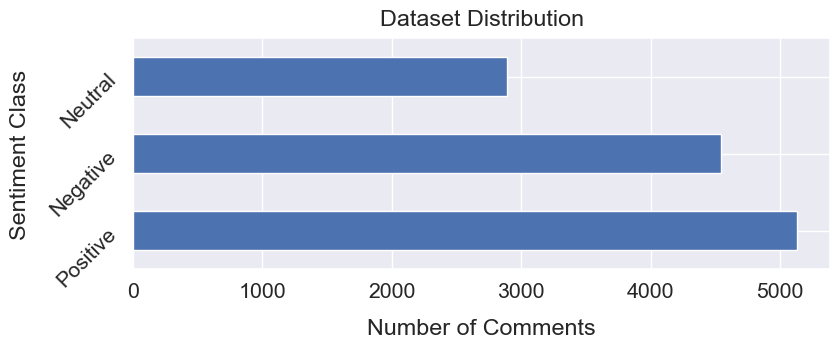

In [14]:
sns.set(font_scale=1.4)
data['Label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

### Data Cleaning

In [15]:
# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

In [16]:
# Apply the function into the dataframe
data['cleaned'] = data['Data'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [100,25,854,966,1500,1589,1700,4000,4500]
for i in sample_data:
     print('Original:\n',data.Data[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Label[i],'\n')
     

Original:
 ভর দুপুরে এত খাবার দেখে ভীষণ লোভ লাগল দাদা , দিদি কে দেখতে পেলে ভালো লাগত  
Cleaned:
 ভর দুপুরে এত খাবার দেখে ভীষণ লোভ লাগল দাদা   দিদি কে দেখতে পেলে ভালো লাগত  
 Sentiment:--  Positive 

Original:
 ভালো লাগল বিউটি বোডিং দেখে । আমি শুনেছি বাংলাদেশ এর সাধীনতা র ইতিহাস এর সাথে একাত্ত্ব এই বোডিং হাউস 
Cleaned:
 ভালো লাগল বিউটি বোডিং দেখে   আমি শুনেছি বাংলাদেশ এর সাধীনতা র ইতিহাস এর সাথে একাত্ত্ব এই বোডিং হাউস 
 Sentiment:--  Positive 

Original:
 আল্লাহ কে ভয় করা উচিত । অাল্লাহ চাইলে এর চেয়েও ভয়াবহ ভাবে পৃথিবী ধ্বংস করতে পারেন । এটা নমুনা মাত্র  
Cleaned:
 আল্লাহ কে ভয় করা উচিত   অাল্লাহ চাইলে এর চেয়েও ভয়াবহ ভাবে পৃথিবী ধ্বংস করতে পারেন   এটা নমুনা মাত্র  
 Sentiment:--  Positive 

Original:
 বাংলাদেশের কি গুন , শুধু নিউজিই হয় । এত খুন ধর্ষণ হয় একটারও তো ফাঁসি হয় না । বলতে লজ্জা লাগে আমাদের দেশটা হয়ে যাচ্ছে মেরুদন্ডহীন দেশ  
Cleaned:
 বাংলাদেশের কি গুন   শুধু নিউজিই হয়   এত খুন ধর্ষণ হয় একটারও তো ফাঁসি হয় না   বলতে লজ্জা লাগে আমাদের দেশটা হয়ে যাচ্ছে মেরুদন্ডহীন দেশ  
 S

### Remove Low lenght data

In [17]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 7 Small Reviews 
Total Reviews: 12568


# Dataset Summary

In [18]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Label==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
        
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset) 


Class Name :  Positive
Number of Documents:5133
Number of Words:73627
Number of Unique Words:13103
Most Frequent Words:

না	1001
ভাই	977
আপনার	782
ভালো	753
অনেক	744
আর	627
করে	599
আমি	598
জন্য	597
এই	563

Class Name :  Negative
Number of Documents:4548
Number of Words:68743
Number of Unique Words:12373
Most Frequent Words:

না	2071
আর	795
করে	785
এই	774
কি	670
পুলিশ	508
হয়	446
তো	395
ভাই	361
টাকা	360

Class Name :  Neutral
Number of Documents:2887
Number of Words:34074
Number of Unique Words:8565
Most Frequent Words:

না	1150
ভাই	386
কি	377
করে	286
আর	284
এই	258
হয়	229
থেকে	229
আমি	220
হবে	197
Total Number of Unique Words:23980


### Dataset Summary Visualization

/var/folders/9m/0wbdtdd96m7859zq2pz0f1l40000gn/T/ipykernel_868/3248998458.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(class_names, rotation=45);


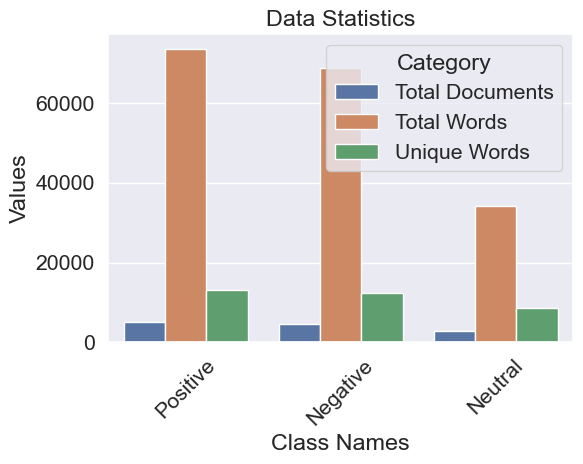

In [19]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

### Comment Lenght Distribution

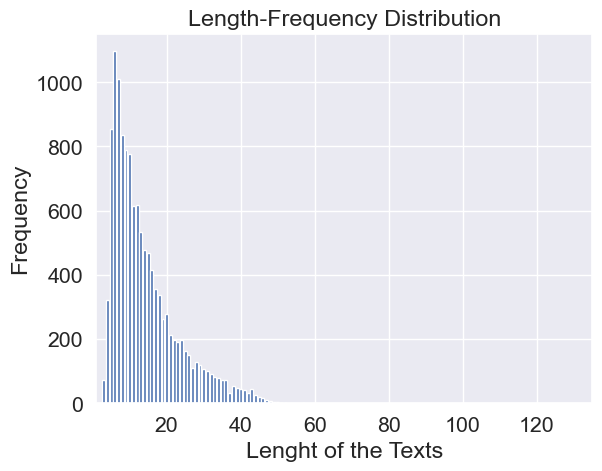

Maximum Length of a Comments: 57
Minimum Length of a Comments: 2
Average Length of a Comments: 14.0


In [20]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Comments: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a Comments: {min(dataset.ReviewLength)}")
print(f"Average Length of a Comments: {round(np.mean(dataset.ReviewLength),0)}")

# Model Building

### Taking only positive and negative datasets

In [21]:
# since the number of positive and negative comments are more than neutral we are taking the big two
positive = dataset[dataset.Label == 'Positive']
negative = dataset[dataset.Label == 'Negative']
dataset = pd.concat([positive, negative])
dataset.Label.value_counts()

Label
Positive    5133
Negative    4548
Name: count, dtype: int64

### Lable Encoding and Dataset Splitting

In [16]:
                                       #==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test
     

In [17]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

### Feature Extraction Using TF-IDF

In [18]:

                                            #======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
     

In [20]:

                                              #============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================
            
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df    

# Model Training

In [21]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Label,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 20748

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 9681 
	Training		 8712 
	Test			 969


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 107881

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 9681 
	Training		 8712 
	Test			 969


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 210293

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 9681 
	Training		 8712 
	Test			 969


# Performance Table

In [23]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  if gram == 'Unigram':
    ngram_range = (1, 1)
  elif gram == 'Bigram':
    ngram_range = (1, 2)
  elif gram == 'Trigram':
    ngram_range = (1, 3)
  
  tfidf,feature = calc_gram_tfidf(dataset.cleaned,ngram_range)
  labels = label_encoding(dataset.Label,False)
  X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
  ml_models,model_names = ml_models_defination()
  model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
  accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
  
  print(f"\n========== Performace Table for {gram} feature:========\n")
  
  # Calculate and print the performance metrics
  for model_name, metrics in accuracy.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"F1-Score: {metrics['F1 Score']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 20748

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 9681 
	Training		 8712 
	Test			 969

========== Performace Table for Unigram feature:========

Model: LR
Accuracy: 81.11
F1-Score: 82.39
Precision: 80.75
Recall: 84.09

Model: DT
Accuracy: 77.3
F1-Score: 78.25999999999999
Precision: 78.73
Recall: 77.8

Model: RF
Accuracy: 82.35
F1-Score: 83.64
Precision: 81.53
Recall: 85.85000000000001

Model: MNB
Accuracy: 82.04
F1-Score: 83.24000000000001
Precision: 81.66
Recall: 84.87

Model: KNN
Accuracy: 73.99
F1-Score: 75.25
Precision: 75.25
Recall: 75.25

Model: Linear SVM
Accuracy: 80.28999999999999
F1-Score: 81.76
Precision: 79.55
Recall: 84.09

Model: RBF SVM
Accuracy: 80.91000000000001
F1-Score: 82.3
Precision: 80.22
Recall: 84.48



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 107881

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 9681 
	Training		 8712 
	Test			 969

========== Performace Table for Bigram feature:========

Model: LR
Accuracy: 82.46
F1-Score: 83.62
Precision: 82.04
Recall: 85.27

Model: DT
Accuracy: 75.53999999999999
F1-Score: 76.46
Precision: 77.31
Recall: 75.64

Model: RF
Accuracy: 82.66
F1-Score: 84.09
Precision: 81.17
Recall: 87.22999999999999

Model: MNB
Accuracy: 83.59
F1-Score: 84.49
Precision: 83.91
Recall: 85.07000000000001

Model: KNN
Accuracy: 75.94999999999999
F1-Score: 77.27000000000001
Precision: 76.74
Recall: 77.8

Model: Linear SVM
Accuracy: 80.5
F1-Score: 82.15
Precision: 79.09
Recall: 85.46000000000001

Model: RBF SVM
Accuracy: 81.53
F1-Score: 82.89999999999999
Precision: 80.67
Recall: 85.27



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 210293

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 9681 
	Training		 8712 
	Test			 969

========== Performace Table for Trigram feature:========

Model: LR
Accuracy: 82.66
F1-Score: 83.91
Precision: 81.87
Recall: 86.05000000000001

Model: DT
Accuracy: 76.25999999999999
F1-Score: 77.45
Precision: 77.3
Recall: 77.60000000000001

Model: RF
Accuracy: 82.46
F1-Score: 83.89999999999999
Precision: 80.99
Recall: 87.03

Model: MNB
Accuracy: 83.17999999999999
F1-Score: 84.1
Precision: 83.53
Recall: 84.68

Model: KNN
Accuracy: 75.85
F1-Score: 77.14999999999999
Precision: 76.7
Recall: 77.60000000000001

Model: Linear SVM
Accuracy: 79.97999999999999
F1-Score: 82.07
Precision: 77.49000000000001
Recall: 87.22999999999999

Model: RBF SVM
Accuracy: 81.84
F1-Score: 83.27
Precision: 80.66
Recall: 86.05000000000001



# Conclusion

### From this performance table it can be said that the Trigarm and Bigarm feature combination with Multinomial Naive Bayes classifier provides highest accuray and F1-score value.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 20748

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 9681 
	Training		 8712 
	Test			 969


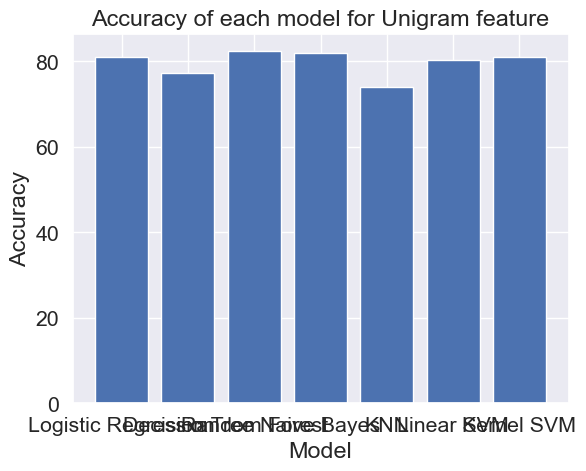

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 107881

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 9681 
	Training		 8712 
	Test			 969


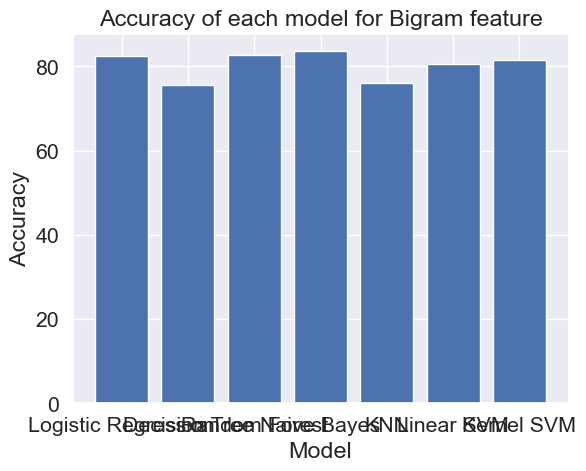

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 210293

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 9681 
	Training		 8712 
	Test			 969


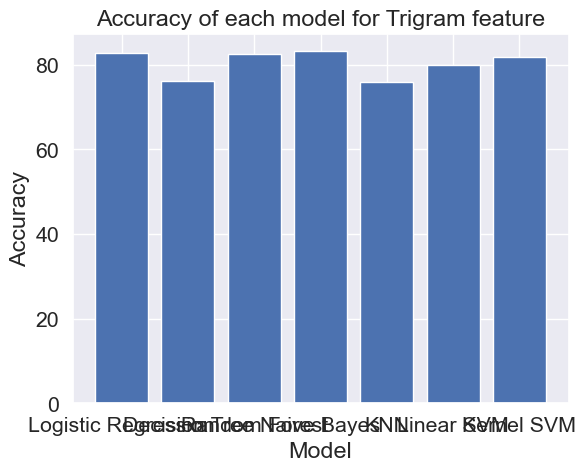

In [25]:
import matplotlib.pyplot as plt

gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  if gram == 'Unigram':
    ngram_range = (1, 1)
  elif gram == 'Bigram':
    ngram_range = (1, 2)
  elif gram == 'Trigram':
    ngram_range = (1, 3)
  
  tfidf,feature = calc_gram_tfidf(dataset.cleaned,ngram_range)
  labels = label_encoding(dataset.Label,False)
  X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
  ml_models,model_names = ml_models_defination()
  
  accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
  
  #print(f"\n========== Performace Table for {gram} feature:========\n")
  
  # Calculate and print the performance metrics
  #for model_name, metrics in accuracy.items():
    #print(f"Model: {model_name}")
    #print(f"Accuracy: {metrics['Accuracy']}")
    #print(f"F1-Score: {metrics['F1 Score']}")
    #print(f"Precision: {metrics['Precision']}")
    #print(f"Recall: {metrics['Recall']}")
    #print()
  
  # Create a bar chart for the accuracy of each model
  models = list(accuracy.keys())
  accuracies = [metrics['Accuracy'] for metrics in accuracy.values()]
  plt.bar(models, accuracies)
  plt.xlabel('Model')
  plt.ylabel('Accuracy')
  plt.title(f'Accuracy of each model for {gram} feature')
  plt.show()